## Visualizing Microsoft Stock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shares_data = pd.read_csv("week2.csv")
shares_data.drop(shares_data.columns[0],axis=1,inplace=True)
shares_data.head(5)

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,Day_Perc_Change,Trend
0,2019-10-24,139.94,139.14,140.40,138.69,37280000,10,2019,0.000000,Slight or No change
1,2019-10-23,137.24,136.88,137.45,135.61,31380000,10,2019,-1.929398,Negative
2,2019-10-22,136.37,138.97,140.01,136.26,27940000,10,2019,-0.633926,Slight negative
3,2019-10-21,138.43,138.45,138.50,137.01,20720000,10,2019,1.510596,Positive
4,2019-10-18,137.41,139.76,140.00,136.56,32280000,10,2019,-0.736835,Slight negative


In [3]:
shares_data['Date'] = pd.to_datetime(shares_data['Date'])
shares_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
Date                     503 non-null datetime64[ns]
Close Price              503 non-null float64
Open Price               503 non-null float64
High Price               503 non-null float64
Low Price                503 non-null float64
Total Traded Quantity    503 non-null int64
Month                    503 non-null int64
Year                     503 non-null int64
Day_Perc_Change          503 non-null float64
Trend                    503 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 39.4+ KB


C:\Users\subha\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


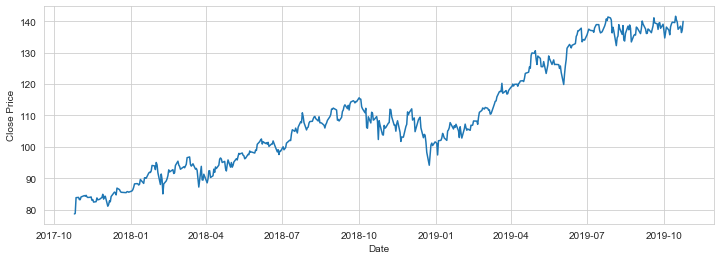

In [4]:
plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
sns.lineplot(x="Date", y="Close Price", data=shares_data)
plt.show()

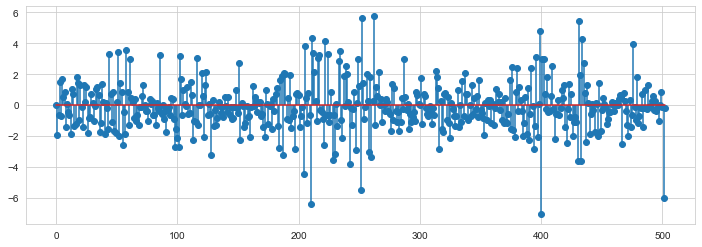

In [5]:
plt.figure(figsize=(12,4))
plt.stem(shares_data["Day_Perc_Change"],use_line_collection=True)
plt.show()

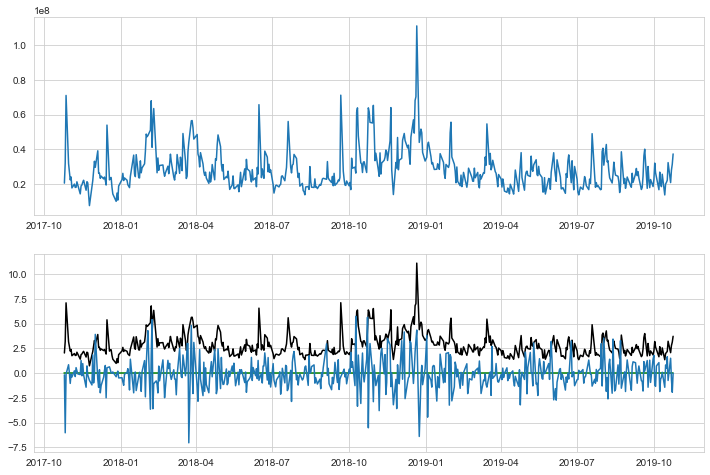

In [6]:
fig, axs = plt.subplots(2,figsize=(12,8))
axs[0].plot(shares_data["Date"],shares_data["Total Traded Quantity"])

axs[1].plot(shares_data["Date"],shares_data["Total Traded Quantity"]/10**7,color='black')
axs[1].plot(shares_data["Date"],shares_data["Total Traded Quantity"]*0,color='green')
axs[1].plot(shares_data["Date"],shares_data["Day_Perc_Change"])

plt.show()

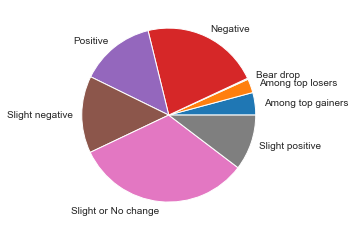

In [24]:
trend_grouped = shares_data.groupby("Trend")
labels=[]
for i,p in trend_grouped:
    labels.append(i)
plt.pie(trend_grouped["Total Traded Quantity"].count(),labels=labels)
plt.show()

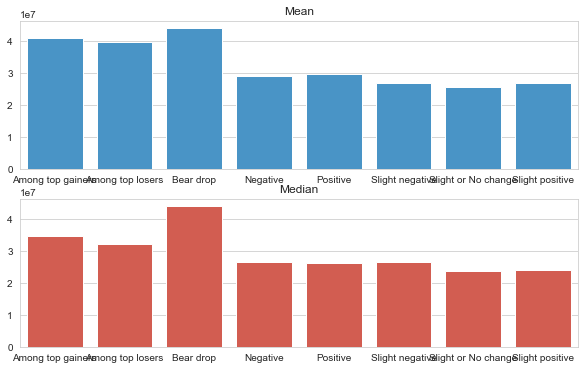

In [70]:
labels=[]
mean = []
median=[]
for name,grp in trend_grouped:
    labels.append(name)
    mean.append(grp["Total Traded Quantity"].mean())
    median.append(grp["Total Traded Quantity"].median())

fig, axis = plt.subplots(2,1,figsize=(10,6))
sns.barplot(x=labels,y=mean,color="#3498db",ax=axis[0]).set_title('Mean')
sns.barplot(x=labels,y=median,color="#e74c3c",ax=axis[1]).set_title('Median')
plt.show()

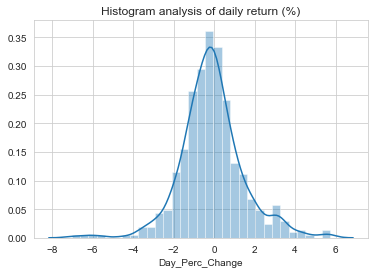

In [7]:
sns.distplot(shares_data["Day_Perc_Change"]).set_title('Histogram analysis of daily return (%)')
plt.show()

### Behavioral analysis of 5 stocks

In [3]:
stock1 = pd.read_csv("stocks/INFY.csv")
stock2 = pd.read_csv("stocks/HINDUNILVR.csv")
stock3 = pd.read_csv("stocks/ITC.csv")
stock4 = pd.read_csv("stocks/RELIANCE.csv")
stock5 = pd.read_csv("stocks/TCS.csv")

mask1 = stock1["Series"]=="EQ"
stock1=stock1[mask1]
mask2 = stock2["Series"]=="EQ"
stock2=stock2[mask2]
mask3 = stock3["Series"]=="EQ"
stock3=stock3[mask3]
mask4 = stock4["Series"]=="EQ"
stock4=stock4[mask4]
mask5 = stock5["Series"]=="EQ"
stock5=stock5[mask5]

stock1 = stock1["Close Price"]
stock2 = stock2["Close Price"]
stock3 = stock3["Close Price"]
stock4 = stock4["Close Price"]
stock5 = stock5["Close Price"]

stocks = pd.DataFrame()
stocks["INFY"] = stock1
stocks["HINDUNILVR"] = stock2
stocks["ITC"]=stock3
stocks["RELIANCE"]=stock4
stocks["TCS"]=stock5

per_chg = pd.DataFrame()
per_chg["INFY"] = stocks["INFY"].pct_change()*100
per_chg["HINDUNILVR"] = stocks["HINDUNILVR"].pct_change()*100
per_chg["ITC"] = stocks["ITC"].pct_change()*100
per_chg["RELIANCE"] = stocks["RELIANCE"].pct_change()*100
per_chg["TCS"] = stocks["TCS"].pct_change()*100


per_chg = per_chg.drop(per_chg.index[0])
per_chg

,INFY,HINDUNILVR,ITC,RELIANCE,TCS
1,0.362566,1.744216,1.978773,0.907671,2.708131
2,-0.230366,0.899640,-0.635033,-0.235936,1.078567
3,0.939337,-1.897167,-1.331440,-1.903037,3.292810
4,-0.395113,1.792477,2.986686,-0.640374,-1.145414
5,0.365364,1.051587,6.079665,0.401865,0.965239
...,...,...,...,...,...
491,0.856069,-0.518409,-1.661238,-3.278750,-3.764557
492,-0.717687,0.891218,-0.414044,-3.309092,1.212477
493,0.236324,-0.956713,-0.266090,-0.421823,-0.273420
494,-0.582484,0.862248,-0.700350,-1.526596,0.041823


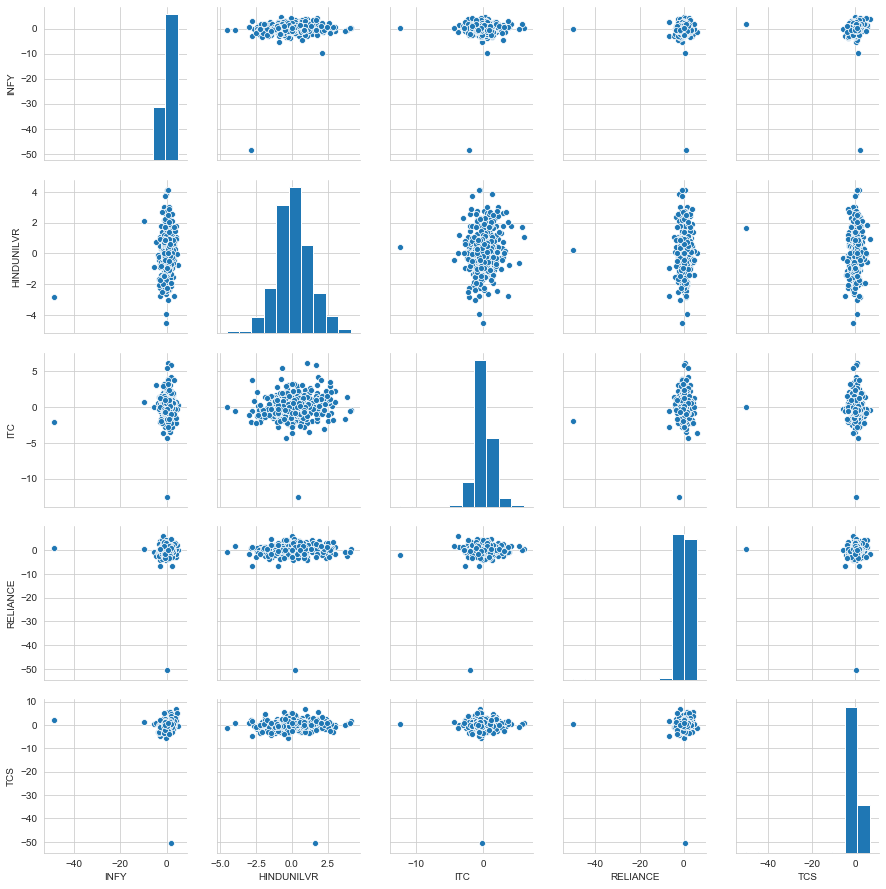

In [121]:
sns.pairplot(per_chg)

In [9]:
vol = pd.DataFrame()
vol['rol_avg INFY'] = per_chg["INFY"].rolling(window=7).mean()
vol['rol_std INFY'] = per_chg["INFY"].rolling(window=7).std()
vol.tail(10)

,rol_avg INFY,rol_std INFY
486,0.209398,1.022302
487,0.534584,1.127752
488,0.282947,1.612642
489,0.062510,1.673132
490,-0.181810,1.639377
491,-0.221362,1.605357
492,-0.170644,1.579376
493,-0.322183,1.461573
494,-0.663815,1.119989
495,-0.216294,0.702465


In [29]:
nifty = pd.read_csv("Nifty50.csv")
nifty['Date'] = pd.to_datetime(nifty['Date'])

nifty["Per_chg"] = nifty["Close"].pct_change()*100
nifty["rol_avg"] = nifty["Per_chg"].rolling(window=7).mean()
nifty["rol_std"] = nifty["Per_chg"].rolling(window=7).std()

nifty.tail()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Per_chg,rol_avg,rol_std
489,2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,-0.865217,-0.278518,0.666354
490,2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,-1.204133,-0.347775,0.740837
491,2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,-0.507507,-0.558755,0.460459
492,2019-05-10,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,-0.202623,-0.579802,0.436348
493,2019-05-13,11258.70,11300.20,11125.60,11148.20,357586433,16722.91,-1.158801,-0.716890,0.447439


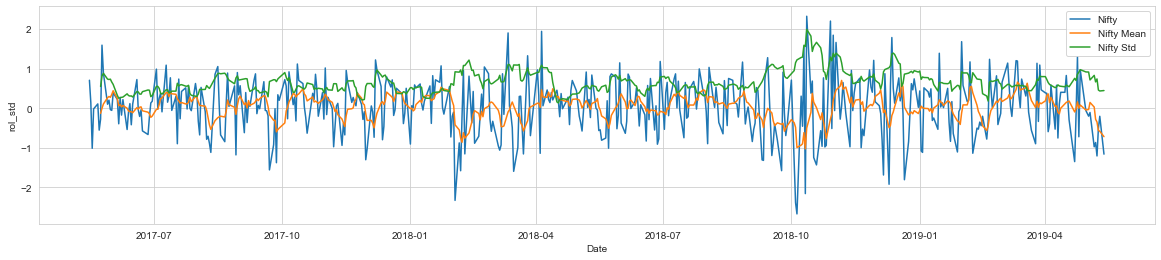

In [36]:
plt.figure(figsize=(20,4))
sns.set_style("whitegrid")
sns.lineplot(x="Date", y="Per_chg", data=nifty)
sns.lineplot(x="Date", y="rol_avg", data=nifty)
sns.lineplot(x="Date", y="rol_std", data=nifty)
plt.legend(labels=["Nifty","Nifty Mean","Nifty Std"])
plt.show()

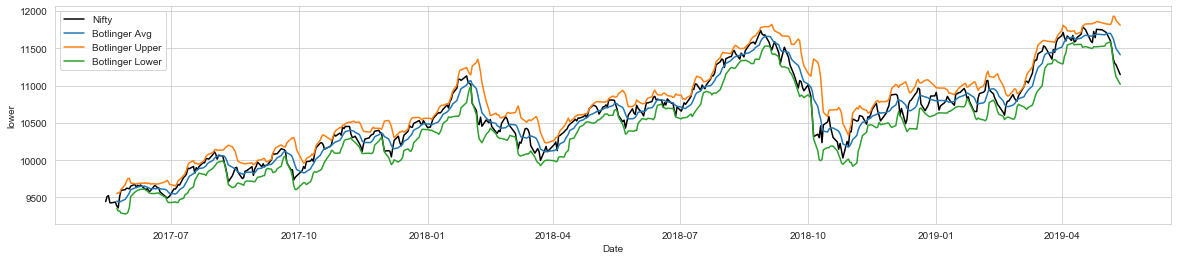

In [47]:
botlinger = pd.DataFrame()
botlinger["Date"] = nifty["Date"]
botlinger["avg"] = nifty["Close"].rolling(window=7).mean()
botlinger["upper"] = nifty["Close"].rolling(window=7).mean() + 2*nifty["Close"].rolling(window=7).std()
botlinger["lower"] = nifty["Close"].rolling(window=7).mean() - 2*nifty["Close"].rolling(window=7).std()


plt.figure(figsize=(20,4))
sns.set_style("whitegrid")
sns.lineplot(x="Date", y="Close", data=nifty,color="black")
sns.lineplot(x="Date", y="avg", data=botlinger)
sns.lineplot(x="Date", y="upper", data=botlinger)
sns.lineplot(x="Date", y="lower", data=botlinger)
plt.legend(labels=["Nifty","Botlinger Avg","Botlinger Upper","Botlinger Lower"])